In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-stock-prices-daily-updating/World-Stock-Prices-Dataset.csv


# Chapter 1 : Data Preprocessing

In [2]:
file_path = "/kaggle/input/world-stock-prices-daily-updating/World-Stock-Prices-Dataset.csv"

# Load data
df_v1 = pd.read_csv(file_path)

In [3]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310071 entries, 0 to 310070
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           310071 non-null  object 
 1   Open           310071 non-null  float64
 2   High           310071 non-null  float64
 3   Low            310071 non-null  float64
 4   Close          310071 non-null  float64
 5   Volume         310071 non-null  float64
 6   Dividends      310071 non-null  float64
 7   Stock Splits   310071 non-null  float64
 8   Brand_Name     310071 non-null  object 
 9   Ticker         310071 non-null  object 
 10  Industry_Tag   310071 non-null  object 
 11  Country        310071 non-null  object 
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 30.8+ MB


In [7]:
# Basic info
print("Shape:", df_v1.shape)
print("Columns:", df_v1.columns.tolist())
print("\nSample rows:")
print(df_v1.head())

# Check for missing values
print("\nMissing values:")
print(df_v1.isnull().sum())

# Check unique companies
print("\nUnique companies:")
print(df_v1['Brand_Name'].unique())

Shape: (310071, 13)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Capital Gains']

Sample rows:
                        Date        Open        High         Low       Close  \
0  2025-07-03 00:00:00-04:00    6.630000    6.740000    6.615000    6.640000   
1  2025-07-03 00:00:00-04:00  106.750000  108.419998  106.330002  107.339996   
2  2025-07-03 00:00:00-04:00   71.040001   71.400002   70.449997   71.349998   
3  2025-07-03 00:00:00-04:00  122.629997  123.050003  121.550003  121.930000   
4  2025-07-03 00:00:00-04:00  325.329987  329.140015  324.179993  328.130005   

      Volume  Dividends  Stock Splits             Brand_Name Ticker  \
0  4230300.0       0.00           0.0                peloton   PTON   
1   560200.0       0.00           0.0                  crocs   CROX   
2  9440500.0       0.00           0.0  the coca-cola company     KO   
3    36600.0       0.00           0.0       

In [9]:
df_v1[~df_v1['Capital Gains'].isnull()]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
17341,2024-07-18 00:00:00-04:00,47.375,47.375,47.375,47.375,0.0,0.0,0.0,puma,PMMAF,apparel,germany,0.0
17427,2024-07-17 00:00:00-04:00,47.375,47.375,47.375,47.375,0.0,0.0,0.0,puma,PMMAF,apparel,germany,0.0


In [12]:
# Check unique stock splits
print("\nUnique Stock Splits:")
print(df_v1['Stock Splits'].unique())

# Check unique tickers
print("\nUnique Ticker:")
print(df_v1['Ticker'].unique())


Unique Stock Splits:
[ 0.         50.         10.          1.196       5.          3.
 20.          4.          0.48732943  2.          7.          1.998
  1.061       1.003       1.004       1.5         1.01368474  1.8
  1.14246544]

Unique Ticker:
['PTON' 'CROX' 'KO' 'ADDYY' 'AXP' 'PMMAF' 'V' 'ADBE' 'UL' 'CSCO' 'JPM'
 'LVMUY' 'ABNB' 'MAR' 'ZI' 'TM' 'HLT' 'MCD' 'HD' 'MA' 'JNJ' 'UBER' 'PG'
 'COIN' 'FDX' 'MMM' 'PHG' 'FL' 'NFLX' 'AMD' 'UBSFY' 'SHOP' 'LUV' 'LOGI'
 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM' 'DIS' 'RBLX' 'NTDOY' 'DAL'
 'MSFT' 'COST' 'AEO' 'CL' 'PINS' 'BAMXF' 'CMG' 'HSY' 'POAHY' 'HMC' 'CRM'
 'NVDA' 'SBUX' 'TSLA' 'TWTR' 'JWN' 'SQ']


In [13]:
print(df_v1['Ticker'].nunique())
print(df_v1['Brand_Name'].nunique())

62
62


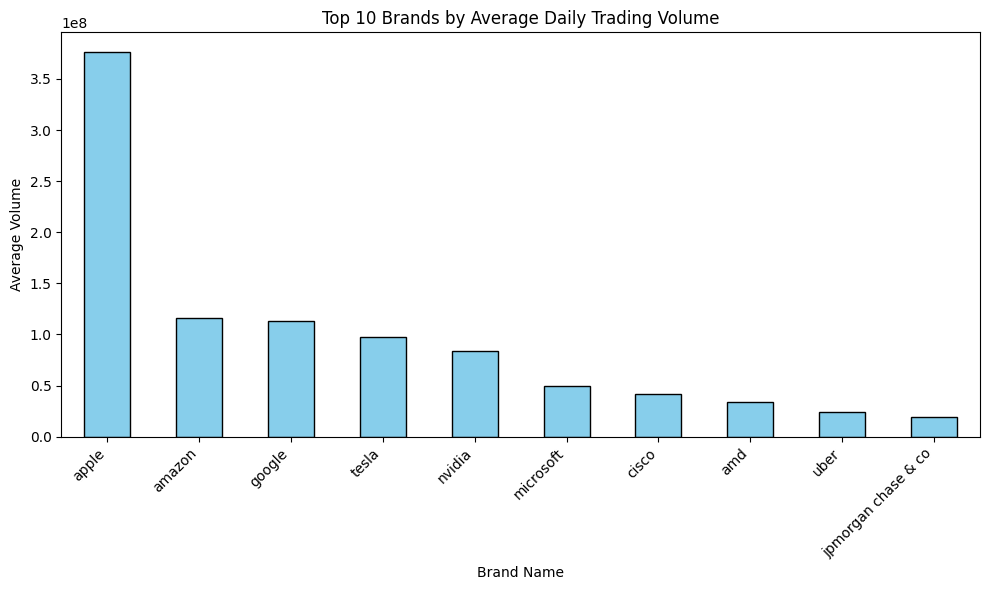

In [15]:
# Group by Brand_Name, calculate average volume
volume_df = df_v1.groupby('Brand_Name')['Volume'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
volume_df.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Brands by Average Daily Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Brand Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Chapter 2 : Brand Selection & EDA

**Uber**

In [16]:
# Filter for Uber
df_v2 = df_v1[df_v1['Brand_Name'].str.lower() == 'uber'].copy()

In [22]:
# Convert Date to datetime (let pandas handle timezone removal)
df_v2['Date'] = pd.to_datetime(df_v2['Date'], utc=True).dt.tz_convert(None)


# Drop Capital Gains
df_v2 = df_v2.drop(columns=['Capital Gains'])


# Print info
print("✅ Uber data shape:", df_v2.shape)
print("✅ Date range:", df_v2['Date'].min().date(), "to", df_v2['Date'].max().date())
print("✅ Columns:", df_v2.columns.tolist())

✅ Uber data shape: (1601, 12)
✅ Date range: 2019-05-10 to 2025-07-03
✅ Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country']


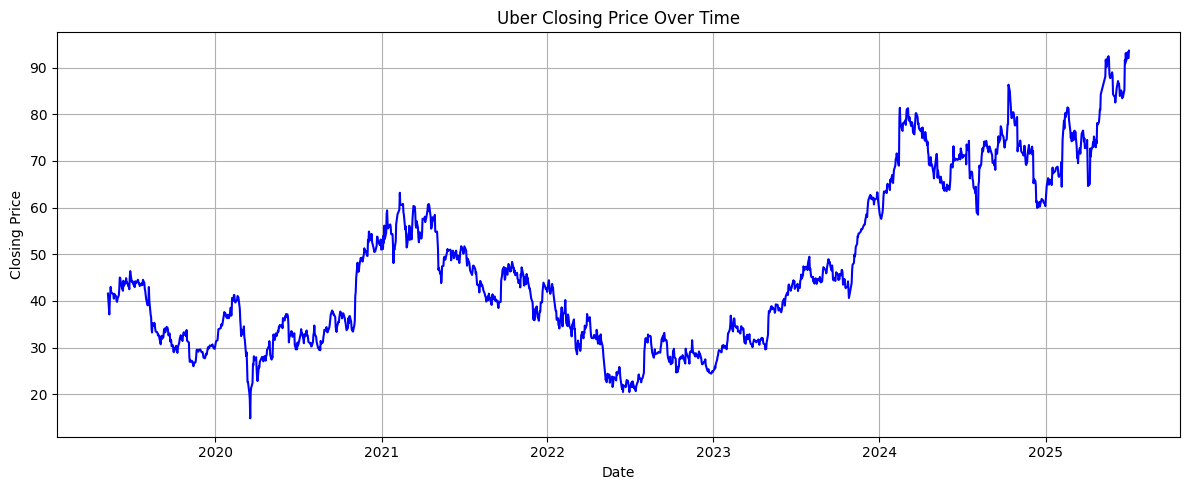

In [23]:
# Closing price plot
plt.figure(figsize=(12, 5))
plt.plot(df_v2['Date'], df_v2['Close'], color='blue')
plt.title('Uber Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

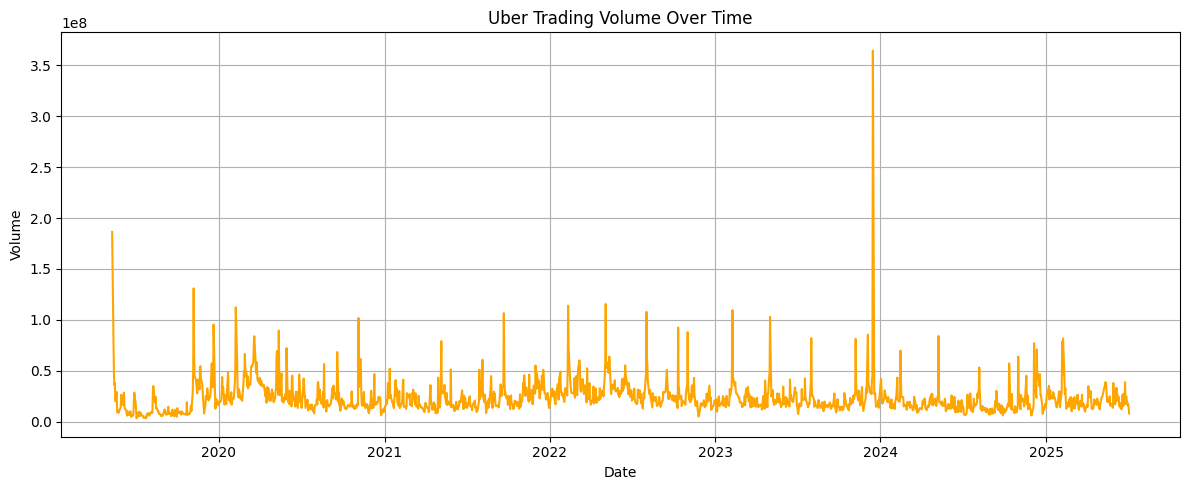

In [24]:
# Volume plot
plt.figure(figsize=(12, 5))
plt.plot(df_v2['Date'], df_v2['Volume'], color='orange')
plt.title('Uber Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

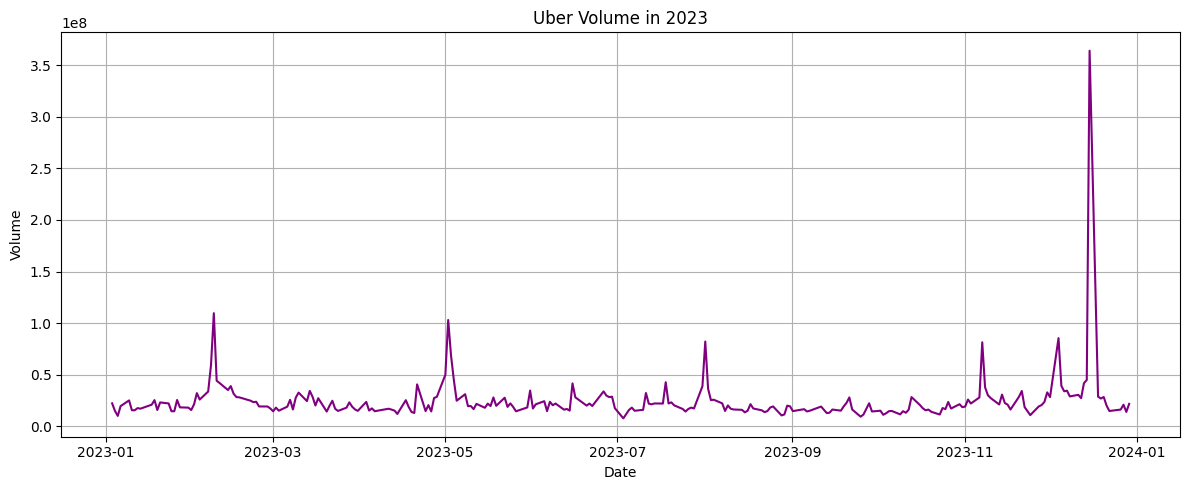

Top 10 volume days in 2023:
                     Date      Close       Volume
26642 2023-12-15 05:00:00  61.860001  364231800.0
39815 2023-02-08 05:00:00  36.830002  109597800.0
36371 2023-05-02 04:00:00  36.520000  102993500.0
27177 2023-12-04 05:00:00  58.630001   85417300.0
32565 2023-08-01 04:00:00  46.650002   82097500.0
28253 2023-11-07 05:00:00  49.919998   81365400.0
36296 2023-05-03 04:00:00  37.840000   68580800.0
39898 2023-02-07 05:00:00  34.900002   59374000.0
36395 2023-05-01 04:00:00  32.740002   49867100.0
36246 2023-05-04 04:00:00  37.490002   44819400.0


In [26]:

df_2023 = df_v2[(df_v2['Date'] >= '2023-01-01') & (df_v2['Date'] <= '2023-12-31')].copy()

# Plot volume
plt.figure(figsize=(12, 5))
plt.plot(df_2023['Date'], df_2023['Volume'], color='purple')
plt.title('Uber Volume in 2023')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find dates with highest volume (e.g. top 5)
top_vol = df_2023.sort_values('Volume', ascending=False).head(10)
print("Top 10 volume days in 2023:")
print(top_vol[['Date', 'Close', 'Volume']])


In [28]:
# df_v2['Volume'].hist(bins=50, figsize=(10,5))

In [30]:
df_v2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
21,2025-07-03 04:00:00,92.629997,94.110001,92.610001,93.629997,8112600.0,0.0,0.0,uber,UBER,technology,usa
106,2025-07-02 04:00:00,91.879997,94.099998,91.550003,92.050003,13599900.0,0.0,0.0,uber,UBER,technology,usa
135,2025-07-01 04:00:00,92.849998,93.239998,90.309998,92.129997,17114200.0,0.0,0.0,uber,UBER,technology,usa
235,2025-06-30 04:00:00,91.684998,93.385002,91.519997,93.300003,16143100.0,0.0,0.0,uber,UBER,technology,usa
287,2025-06-27 04:00:00,92.099998,92.510002,89.971199,91.529999,23074937.0,0.0,0.0,uber,UBER,technology,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
95491,2019-05-16 04:00:00,41.480000,44.060001,41.250000,43.000000,38115500.0,0.0,0.0,uber,UBER,technology,usa
95562,2019-05-15 04:00:00,39.369999,41.880001,38.950001,41.290001,36086100.0,0.0,0.0,uber,UBER,technology,usa
95582,2019-05-14 04:00:00,38.310001,39.959999,36.849998,39.959999,46661100.0,0.0,0.0,uber,UBER,technology,usa
95654,2019-05-13 04:00:00,38.790001,39.240002,36.080002,37.099998,79442400.0,0.0,0.0,uber,UBER,technology,usa


In [31]:
spike_day = df_2023[df_2023['Date'] == pd.to_datetime('2023-12-15 05:00:00')]
print(spike_day[['Date', 'Dividends', 'Stock Splits', 'Close', 'Volume']])

                     Date  Dividends  Stock Splits      Close       Volume
26642 2023-12-15 05:00:00        0.0           0.0  61.860001  364231800.0


In [32]:
threshold = df_v2['Volume'].quantile(0.99)  # top 1% volume as spike threshold
df_v2['High_Volume_Flag'] = (df_v2['Volume'] > threshold).astype(int)

📈 Uber’s 2023-12-15 Spike Context

1. No dividends or splits that day → spike due to unusual trading volume rather than corporate action.
2. Nasdaq after-hours data confirms Uber was among the most actively traded stocks on that date (millions of shares traded). (https://www.nasdaq.com/articles/after-hours-most-active-for-dec-15-2023-:-uber-lcid-pfe-ko-aapl-pcg-ebay-alk-msft-see-csco)
3. No abnormal price drop—closing price stable at $61.86.
4. The spike likely due to high investor interest, possibly anticipation around earnings or investor updates coming soon (Feb 2024 earnings report you found).
5. Could be speculative trading, large block trades, or market maker activity.



In [35]:
# df_v2[df_v2.High_Volume_Flag == 1]